In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df=pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype("float")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.duplicated().sum()

0

In [8]:
df['customerID'].duplicated().sum()

0

#converting 0 and 1 values of Senior Citizen to yes or no for better understanding

In [9]:
def conv(val):
    if(val==0):
        return "no"
    else:
        return "yes"

df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


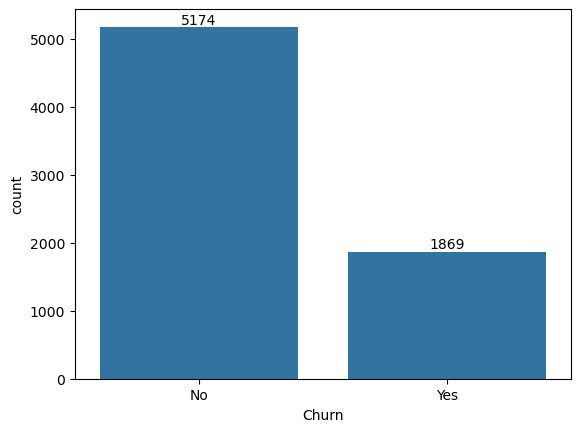

In [11]:
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.show()

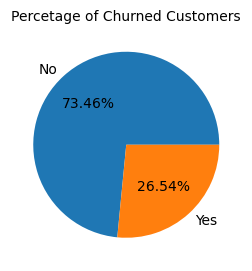

In [12]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({"Churn": "count"})
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.2f%%')
plt.title("Percetage of Churned Customers",fontsize=10)
plt.show()

#from the given pie chart we know that 26.54%of our Customer have Churned out


#now let's do some Analysis to find the reason

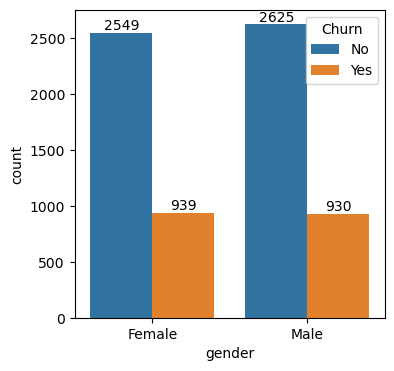

In [19]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='gender',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

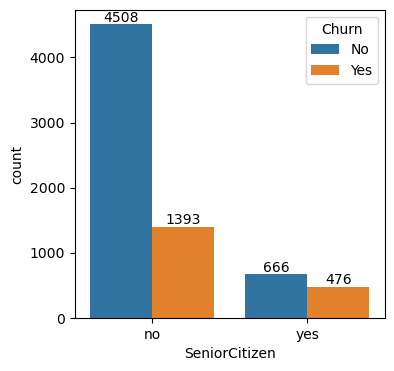

In [25]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show() 

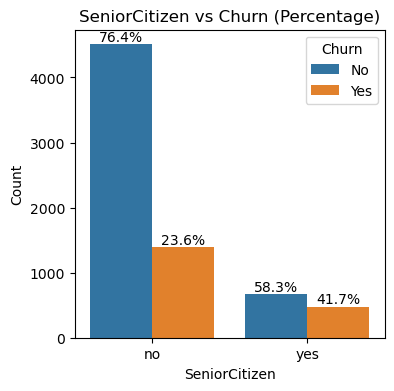

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the plot
plt.figure(figsize=(4, 4))
ax = sns.countplot(x='SeniorCitizen', data=df, hue='Churn')

# Calculate percentages
total_counts = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='count')
total_per_senior = df.groupby('SeniorCitizen').size().reset_index(name='total')
percent_df = pd.merge(total_counts, total_per_senior, on='SeniorCitizen')
percent_df['percent'] = (percent_df['count'] / percent_df['total'] * 100).round(1)

# Add percentage labels to bars
for container, (name, group) in zip(ax.containers, percent_df.groupby('Churn')):
    labels = [f'{p}%' for p in group['percent']]
    ax.bar_label(container, labels=labels, label_type='edge')

plt.title('SeniorCitizen vs Churn (Percentage)')
plt.ylabel('Count')
plt.show()


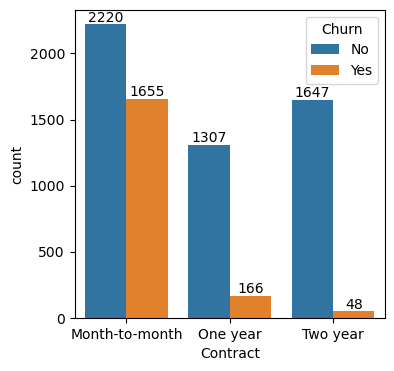

In [26]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show() 

#people who are in contract for 1 month are churning us more as compared to the long term (one or two year) contracts so we can advice or give people some benifits and do something so that people will take long term contract rather than short term contract

In [28]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

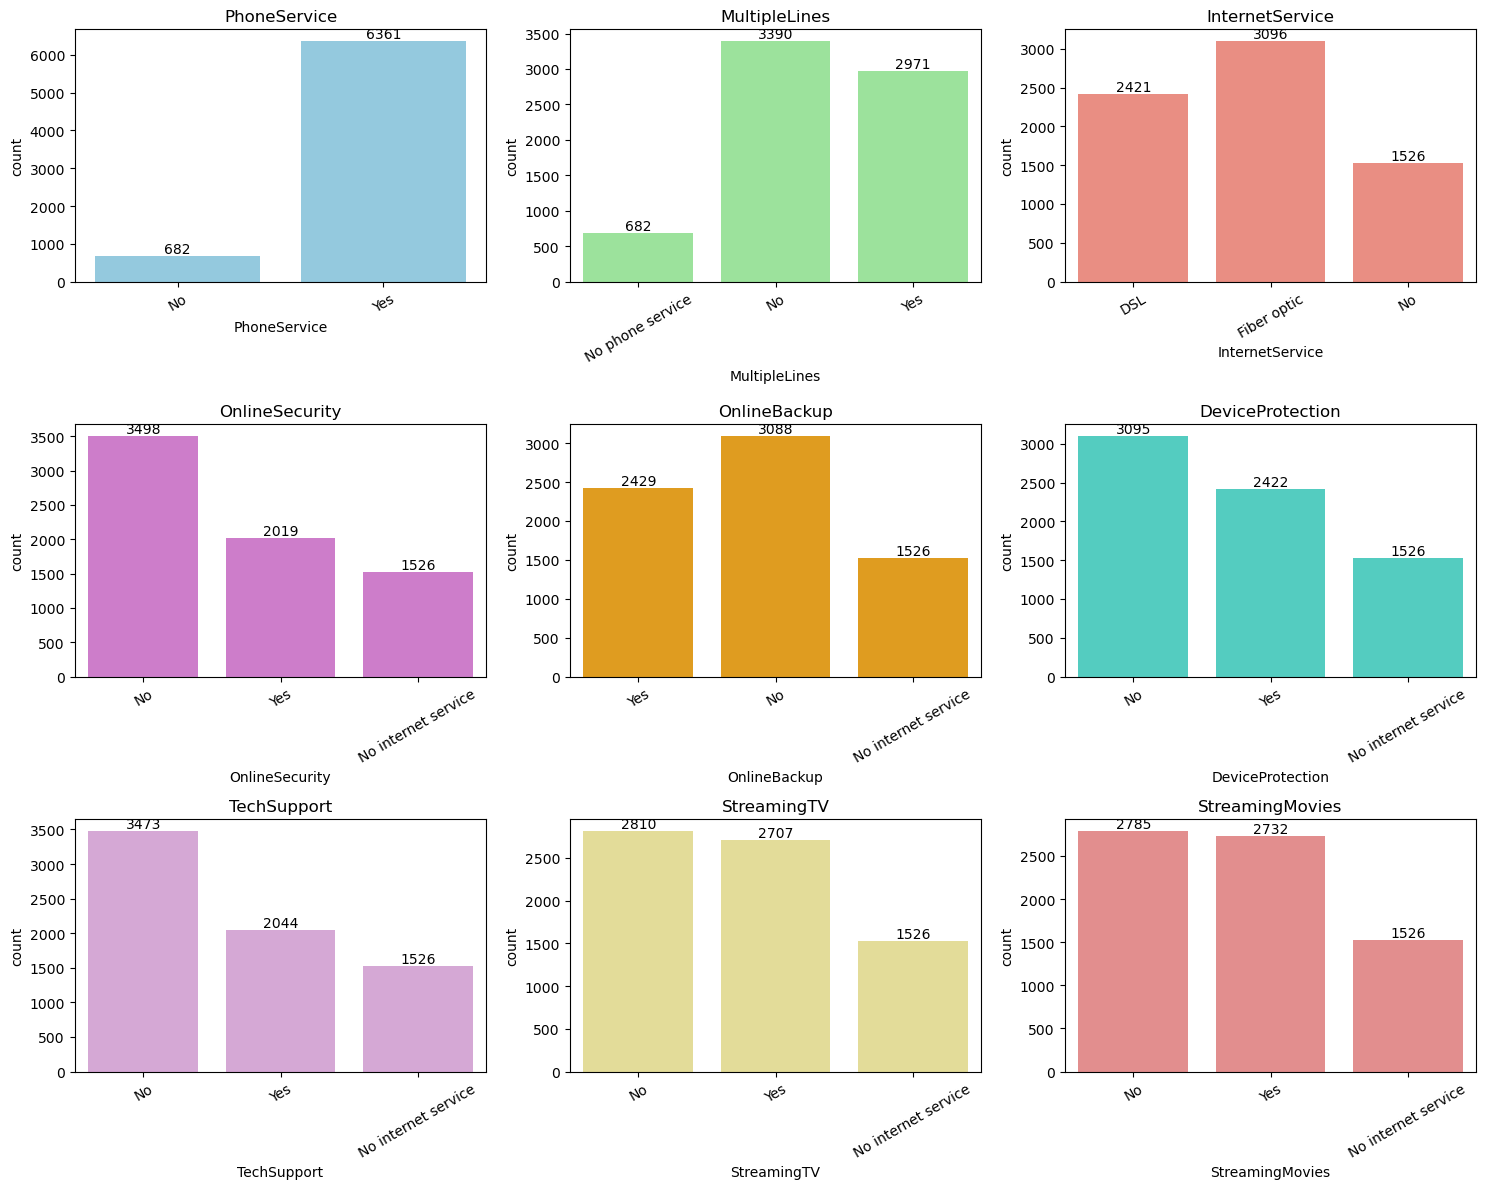

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

colors = ['skyblue', 'lightgreen', 'salmon', 'orchid', 'orange', 'turquoise', 'plum', 'khaki', 'lightcoral']

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, (col, color) in enumerate(zip(cols, colors), 1):
    plt.subplot(n_rows, n_cols, i)
    ax = sns.countplot(x=col, data=df, color=color)
    ax.bar_label(ax.containers[0])
    ax.set_title(col)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


#1526 people are not taking internet services due to which the rest of the entertainment stuffs they are unable to take 

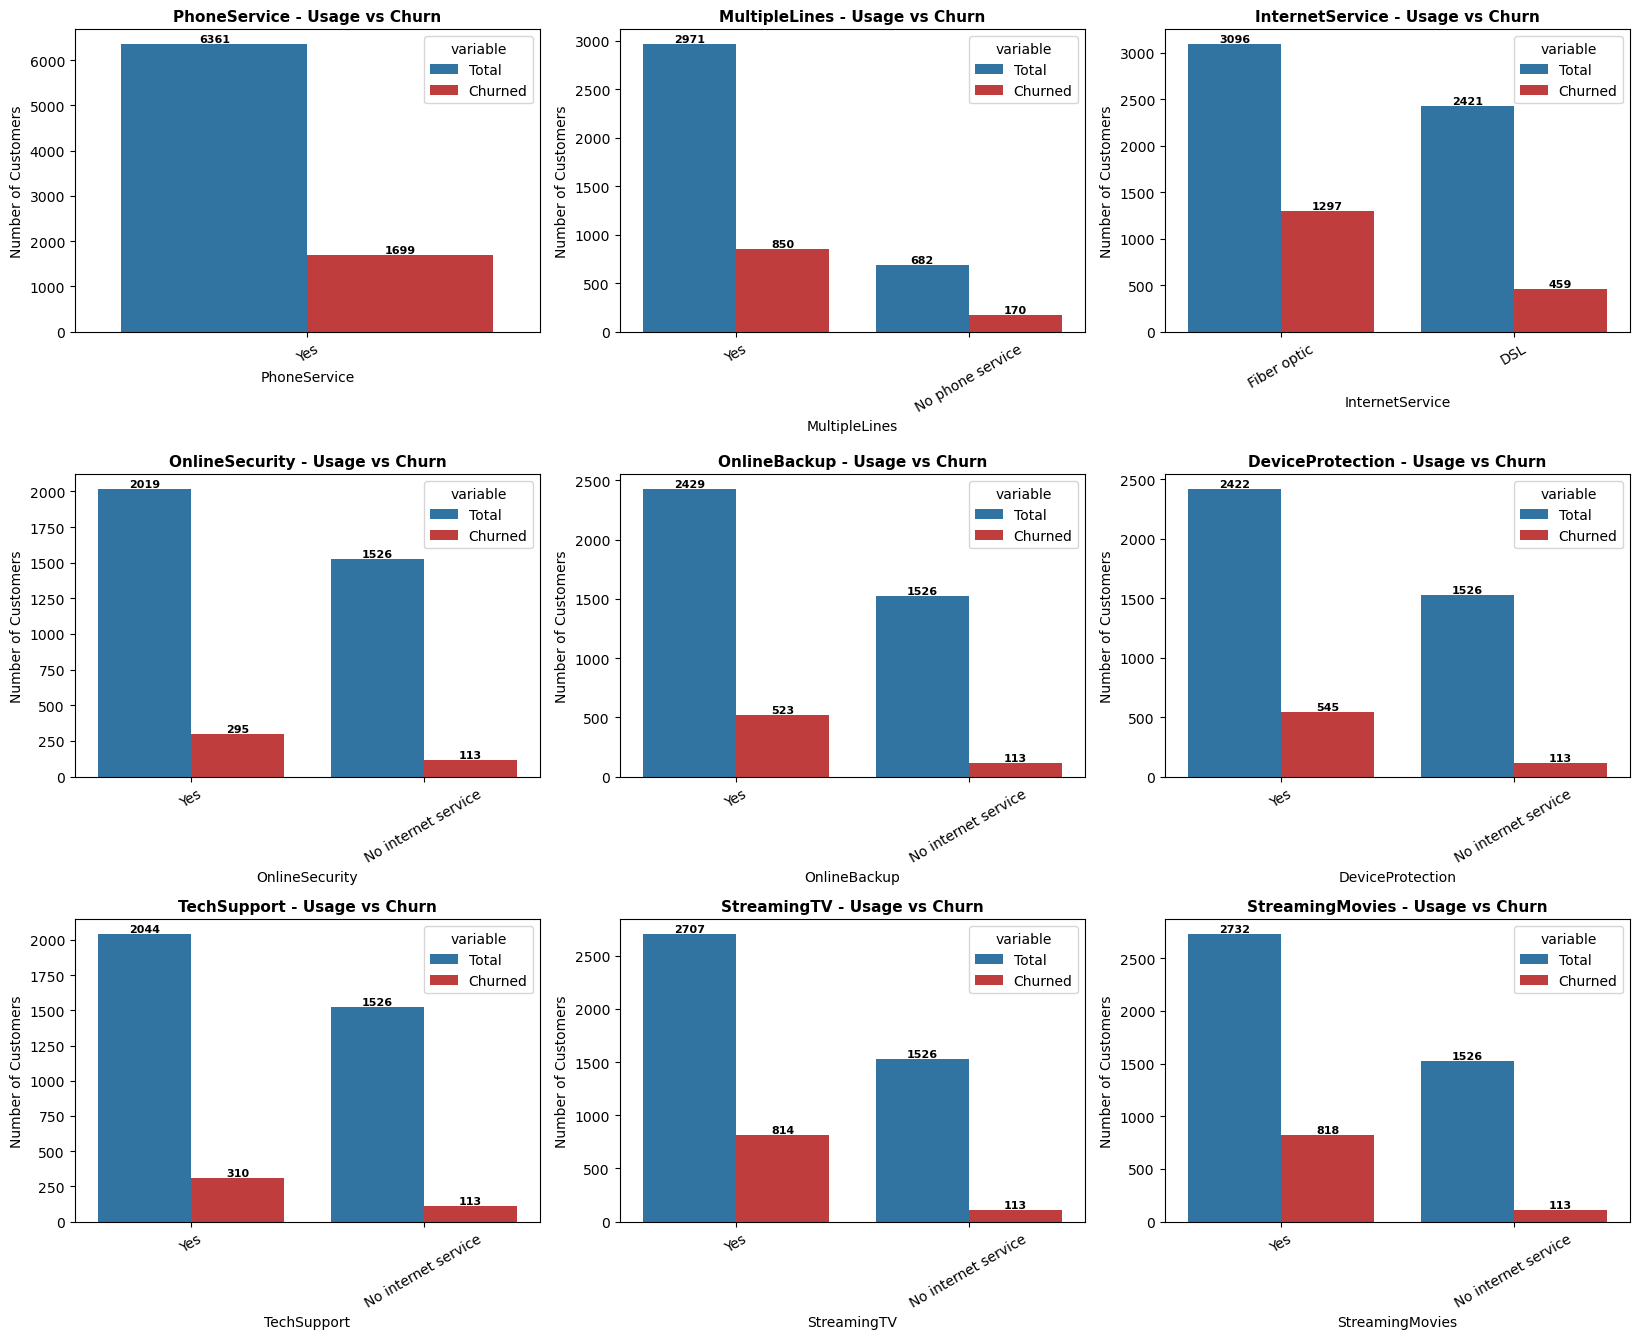

In [42]:
# Columns representing services
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5.5, n_rows * 4.5))

# Darker color palette
palette = ['#1f77b4', '#d62728']  # Dark blue and dark red

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)

    # Filter out 'No' or invalid values to focus on users
    used_df = df[df[col] != 'No']

    # Total users
    total_counts = used_df[col].value_counts().reset_index()
    total_counts.columns = [col, 'Total']

    # Churned users
    churn_counts = used_df[used_df['Churn'] == 'Yes'][col].value_counts().reset_index()
    churn_counts.columns = [col, 'Churned']

    # Merge both
    merged = pd.merge(total_counts, churn_counts, on=col, how='left').fillna(0)

    # Melt for barplot
    melted = merged.melt(id_vars=col, value_vars=['Total', 'Churned'])

    # Plot
    ax = sns.barplot(data=melted, x=col, y='value', hue='variable', palette=palette)

    ax.set_title(f'{col} - Usage vs Churn', fontsize=11, weight='bold')
    ax.set_ylabel('Number of Customers')
    plt.xticks(rotation=30)

    # Add number labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, weight='bold')

plt.tight_layout()
plt.show()


#no of people who have churned out due to fiber optic and have to work on it
#secondly we have to work on diffrent field as well 

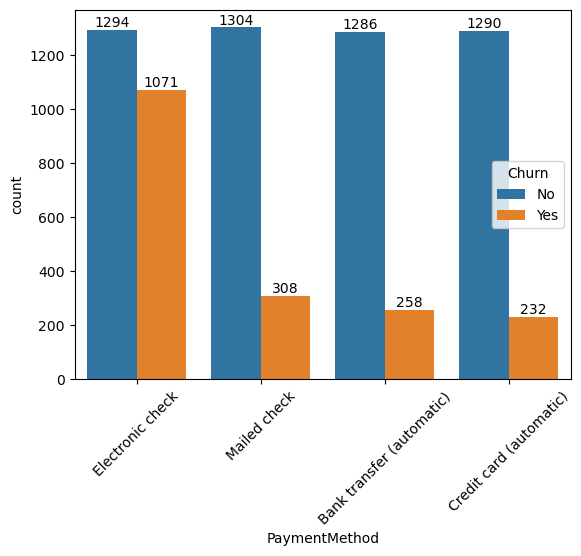

In [49]:
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.show() 

customers who are likely to pay using electronic check are churning us 

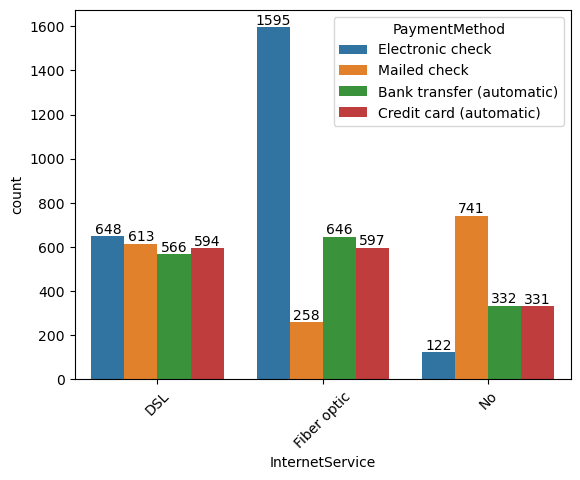

In [53]:
ax=sns.countplot(x='InternetService',data=df,hue='PaymentMethod')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
plt.xticks(rotation=45)
plt.show() 

so as we have just analyse that people who are churning us are using electornic check method to pay and the people using fiber optic are mostly using that method to pay which might be the case of its being churned out